In [7]:
import pandas as pd

def clean_data(df):
    # Drop columns: 'Original Lockname', 'Lockname' and 11 other columns
    df = df.drop(columns=['Original Lockname', 'Lockname', 'Start Timestamp', 'End Timestamp', 'Start_Duration', 'End_Duration', 'curIntent', 'intent', 'mode', 'LOCK_OBJECT_TYPE    ', 'DATA_PARTITION_ID   ', 'TBSP_NAME           '])
    # Strip column names
    df.columns = df.columns.str.strip()
    return df

# Loaded variable 'df' from URI: /home/adam/Documents/GitHub/lock-pred/data/row_locks.csv
df = pd.read_csv('data/row_locks_large.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,ROWID,PAGEID,TABSCHEMA,TABNAME
0,6,0,SYSIBM,SYSDBAUTH
1,5,0,SYSIBM,SYSDBAUTH
2,6,163,SYSIBM,SYSROUTINES
3,6,163,SYSIBM,SYSROUTINES
4,1,164,SYSIBM,SYSROUTINES


In [8]:
df_clean = df_clean.drop_duplicates(subset='PAGEID', keep='first')
df_clean.head()

,ROWID,PAGEID,TABSCHEMA,TABNAME
0,6,0,SYSIBM,SYSDBAUTH
2,6,163,SYSIBM,SYSROUTINES
4,1,164,SYSIBM,SYSROUTINES
8,2,18318,DB2ADMIN,ORDER_LINE
20,41,16794,DB2ADMIN,ORDER_LINE


In [9]:
# export to csv
df_clean.to_csv('data/row_locks_large_nodupes.csv', index=False)


Number of rows in df_row: 7393
Number of rows in df_row_nodupes: 881
Number of rows in df_row_large: 71910
Number of rows in df_row_large_nodupes: 6964


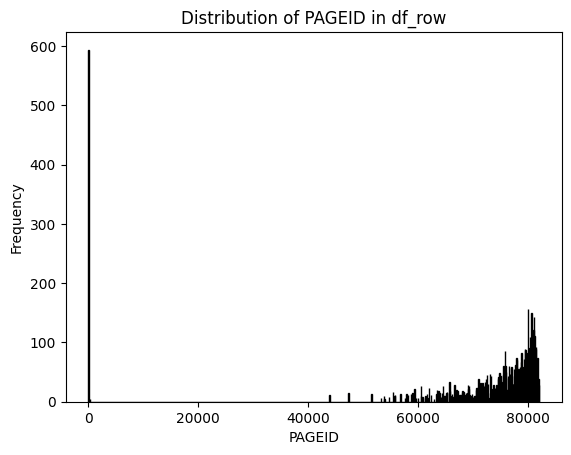

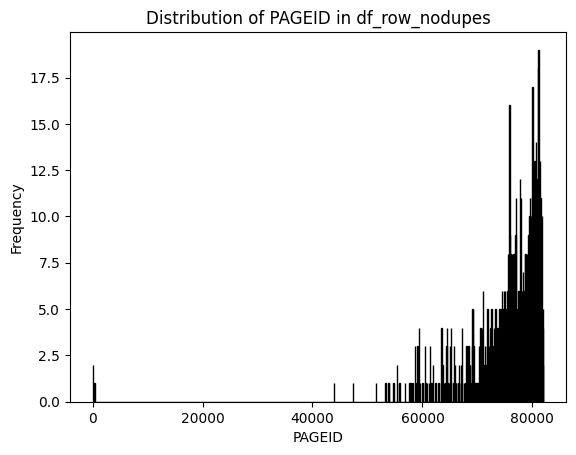

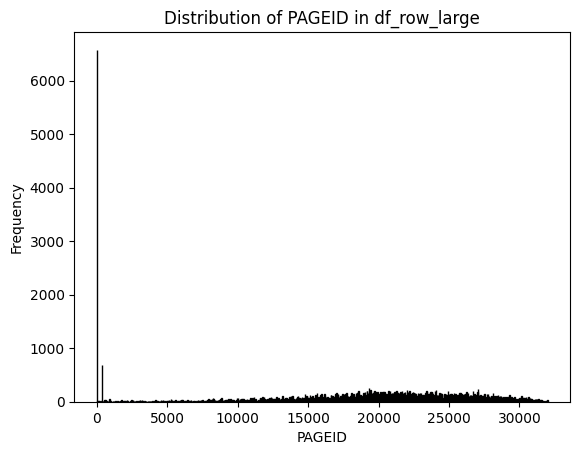

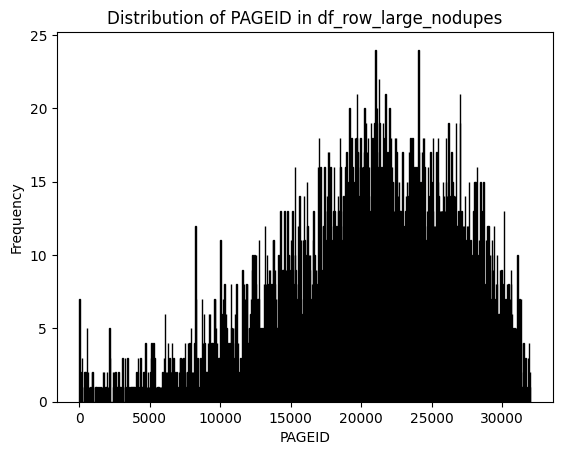

In [15]:
df_row, df_row_nodupes, df_row_large, df_row_large_nodupes = pd.read_csv('data/row_locks.csv'), pd.read_csv('data/row_locks_nodupes.csv'), pd.read_csv('data/row_locks_large.csv'), pd.read_csv('data/row_locks_large_nodupes.csv')

# strip spaces from column names
df_row.columns = df_row.columns.str.strip()
df_row_nodupes.columns = df_row_nodupes.columns.str.strip()
df_row_large.columns = df_row_large.columns.str.strip()
df_row_large_nodupes.columns = df_row_large_nodupes.columns.str.strip()

# print number of rows and the plot the distribution of pageids
print(f"Number of rows in df_row: {len(df_row)}")
print(f"Number of rows in df_row_nodupes: {len(df_row_nodupes)}")
print(f"Number of rows in df_row_large: {len(df_row_large)}")
print(f"Number of rows in df_row_large_nodupes: {len(df_row_large_nodupes)}")

# plot the distribution of pageids
import matplotlib.pyplot as plt

plt.hist(df_row['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_row_nodupes['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row_nodupes')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_row_large['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row_large')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()

plt.hist(df_row_large_nodupes['PAGEID'], bins=1000, edgecolor='black')
plt.title('Distribution of PAGEID in df_row_large_nodupes')
plt.xlabel('PAGEID')
plt.ylabel('Frequency')
plt.show()



